# **Perceptron de Múltiplas Camadas para Classificação**

Considere um problema de classificação de padrões constituído de oito padrões. A
distribuição dos padrões forma um círculo centrado na origem de raio unitário e contido no círculo um losango também centrado na origem e com lados iguais à raiz de 2. Os dados das classes C1, C2, C3, C4 correspondem aos quatro setores do losango e as outras quatro classes correspondem aos setores delimitados pelo círculo e os lados do losango. Após gerar aleatoriamente dados que venham formar estas distribuições de dados, selecione um conjunto de treinamento e um conjunto de validação. **Treine duas redes perceptron (uma rede utilizando a regra delta convencional, e outra usando a regra delta com termo do momento), para classificar os padrões associados a cada uma das classes.** Verifique o
desempenho dos classificadores usando o conjunto de validação e calculando a matriz de
confusão.

**Importando as bibliotecas**

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from math import sqrt
import numpy as np
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import seaborn as srn

import pandas as pd

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
TEMPLATE = 'plotly_dark'
size = 600

# **Parte 1 - Processamento dos Dados**

**Criando o dataset**

In [ ]:
def Points_C1(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(0, -x + 1)
        points.append([x, y, 0])
    return points

def Points_C2(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(0, x + 1)
        points.append([x, y, 1])
    return points

def Points_C3(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-1-x, 0)
        points.append([x, y, 2])
    return points

def Points_C4(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-1+x, 0)
        points.append([x, y, 3])
    return points

def Points_C5(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(1 - x, sqrt(1 - x**2))
        points.append([x, y, 4])
    return points

def Points_C6(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(x+1, sqrt(1 - x**2))
        points.append([x, y, 5])
    return points

def Points_C7(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(-1, 0)
        y = random.uniform(-sqrt(1 - x**2), -1-x)
        points.append([x, y, 6])
    return points

def Points_C8(instancias):
    points = []
    for i in range(instancias):
        x = random.uniform(0, 1)
        y = random.uniform(-sqrt(1 - x**2), -1+x)
        points.append([x, y, 7])
    return points

def generate(instancias):
    points = Points_C1(instancias) + Points_C2(instancias) + Points_C3(instancias) + Points_C4(instancias) + Points_C5(instancias) + Points_C6(instancias) + Points_C7(instancias) + Points_C8(instancias)
    return points

colors = cm.rainbow(np.linspace(0, 1, 8))

res = generate(1000)

X_data = [[row[0], row[1]] for row in res]
X_data = np.array(X_data)
Y_data = [row[2] for row in res]
Y_data = np.array(Y_data)

#plt.scatter(X_data[:,0], X_data[:,1], color=colors[Y_data], marker='.')

X_data, Y_data = shuffle(X_data, Y_data, random_state=0)


In [ ]:
df_to_plot = pd.DataFrame(X_data, columns=["x", "y"])
df_to_plot["c"] = Y_data

In [ ]:
fig = px.scatter(df_to_plot,x="x",y='y', color='c')
fig.update_layout(width=600, height=600)

**Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste**

In [ ]:
(train_X, test_X, train_y, test_y) = train_test_split(X_data, Y_data)

In [ ]:
print('Tamanho do conjunto de treinamento:',len(train_X))
print('Tamanho do conjunto de teste:',len(test_X))

Tamanho do conjunto de treinamento: 6000
Tamanho do conjunto de teste: 2000


# **Parte 2 - Construindo a Rede**

In [ ]:
model = tf.keras.models.Sequential([
               tf.keras.layers.Dense(units=10, activation = 'relu', input_dim = 2),
               tf.keras.layers.Dense(units=10, activation = 'relu'),

               tf.keras.layers.Dense(units=8, activation = 'softmax')])

# **Parte 3 - Treinando a Rede**

In [ ]:
sgd = tf.keras.optimizers.SGD(momentum=0.0)
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_X, train_y, validation_split = 0.2, batch_size=10, epochs = 50)

Epoch 1/50
480/480 [==============================] - 4s 6ms/step - loss: 1.9445 - accuracy: 0.3760 - val_loss: 1.7974 - val_accuracy: 0.4500
Epoch 2/50
480/480 [==============================] - 2s 4ms/step - loss: 1.5997 - accuracy: 0.4679 - val_loss: 1.3730 - val_accuracy: 0.5150
Epoch 3/50
480/480 [==============================] - 2s 5ms/step - loss: 1.1934 - accuracy: 0.5908 - val_loss: 1.0175 - val_accuracy: 0.6942
Epoch 4/50
480/480 [==============================] - 2s 5ms/step - loss: 0.9253 - accuracy: 0.6892 - val_loss: 0.8318 - val_accuracy: 0.7400
Epoch 5/50
480/480 [==============================] - 2s 4ms/step - loss: 0.7855 - accuracy: 0.7365 - val_loss: 0.7207 - val_accuracy: 0.7625
Epoch 6/50
480/480 [==============================] - 3s 6ms/step - loss: 0.6967 - accuracy: 0.7650 - val_loss: 0.6463 - val_accuracy: 0.8033
Epoch 7/50
480/480 [==============================] - 3s 6ms/step - loss: 0.6327 - accuracy: 0.7817 - val_loss: 0.5942 - val_accuracy: 0.7900
Epoch 

# **Parte 4 - Avaliando o Modelo**

**Previsão**

In [ ]:
previsoes = model.predict(test_X)
#print(previsoes)

In [ ]:
precisao = accuracy_score(test_y, np.argmax(previsoes, axis = 1))
print("Acurácia sem o uso do termo do momento:", np.round(precisao*100,2),'%')

Acurácia sem o uso do termo do momento: 95.05 %


**Matriz de confusão**

In [ ]:
matriz = confusion_matrix(test_y, np.argmax(previsoes, axis = 1))
print(matriz)

[[271   0   0   0   7   0   0   0]
 [  4 235   1   0   1   7   0   0]
 [  0   0 240   0   0   0   1   0]
 [ 31   0   5 201   0   0   0  21]
 [  6   0   0   0 243   0   0   0]
 [  0   2   0   0   2 242   0   0]
 [  0   0  11   0   0   0 238   0]
 [  0   0   0   0   0   0   0 231]]


**Gráfico de classificação**

In [ ]:
df_to_plot = pd.DataFrame(test_X, columns=["x", "y"])
df_to_plot["pred"] = np.argmax(previsoes, axis = 1)
df_to_plot["expected"] = test_y

In [ ]:
fig = px.scatter(df_to_plot,x="x",y='y', color='pred')
fig.update_layout(width=500, height=500)

**Histórico da Função de Perda**

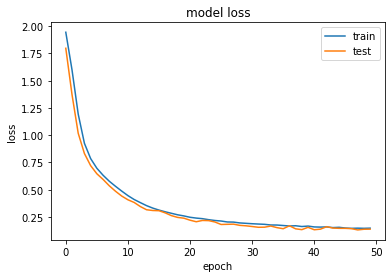

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# **Parte 5 - Criando um Novo Modelo com o Termo do Momento**

**Construindo a rede**

In [ ]:
model2 = tf.keras.models.Sequential([
               tf.keras.layers.Dense(units=10, activation = 'relu', input_dim = 2),
               tf.keras.layers.Dense(units = 10, activation = 'relu'),

               tf.keras.layers.Dense(units = 8, activation = 'softmax')])

**Treinando a rede**

In [ ]:
sgd = tf.keras.optimizers.SGD(momentum=0.4)
model2.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history2 = model2.fit(train_X, train_y, validation_split = 0.2, batch_size=10, epochs = 50)

Epoch 1/50
480/480 [==============================] - 2s 2ms/step - loss: 1.8974 - accuracy: 0.3154 - val_loss: 1.6290 - val_accuracy: 0.5067
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 1.3592 - accuracy: 0.5419 - val_loss: 1.0598 - val_accuracy: 0.6650
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.9113 - accuracy: 0.6825 - val_loss: 0.7533 - val_accuracy: 0.7625
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.7658 - val_loss: 0.6114 - val_accuracy: 0.8008
Epoch 5/50
480/480 [==============================] - 1s 3ms/step - loss: 0.5728 - accuracy: 0.8106 - val_loss: 0.5034 - val_accuracy: 0.8692
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.4802 - accuracy: 0.8471 - val_loss: 0.4161 - val_accuracy: 0.8775
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.4100 - accuracy: 0.8731 - val_loss: 0.3594 - val_accuracy: 0.8908
Epoch 

**Previsão**

In [ ]:
previsoes2 = model2.predict(test_X)
#print(previsoes2)

In [ ]:
precisao2 = accuracy_score(test_y, np.argmax(previsoes2, axis = 1))
print("Acurácia com o uso do termo do momento:", np.round(precisao2*100,2),'%')

Acurácia com o uso do termo do momento: 94.85 %


**Gráfico de Classificação**

In [ ]:
df_to_plot = pd.DataFrame(test_X, columns=["x", "y"])
df_to_plot["pred"] = np.argmax(previsoes2, axis = 1)
df_to_plot["expected"] = test_y

In [ ]:
# pred 0 a 7, class real 1 a 8 
fig = px.scatter(df_to_plot,x="x",y='y', color='pred')
fig.update_layout(width=500, height=500)

**Matriz de confusão**

In [ ]:
matriz = confusion_matrix(test_y, np.argmax(previsoes2, axis = 1))
print(matriz)

[[244   7   0  22   5   0   0   0]
 [  0 247   0   0   1   0   0   0]
 [  0  11 230   0   0   0   0   0]
 [  0   0   1 254   0   0   0   3]
 [  5   0   0   0 244   0   0   0]
 [  0  19   0   0   4 223   0   0]
 [  0   0  15   0   0   0 233   1]
 [  0   0   0   9   0   0   0 222]]


**Histórico da Função de Perda**

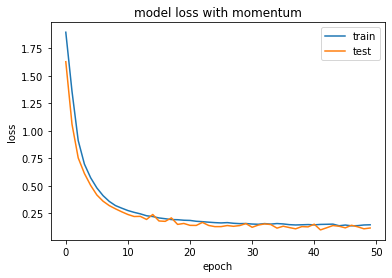

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss with momentum')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**Comparação da Função de Perda do Modelo com e sem Termo do Momento**

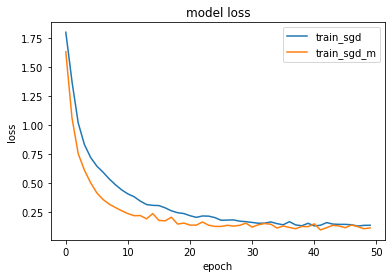

In [ ]:
plt.plot(history.history['val_loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_sgd', 'train_sgd_m'], loc='upper right')
plt.show()